# [Workshop] Analogical Reasoning using kNN

# 0. Installation

In [1]:
# !pip install scikit-learn==0.23.1

# 1. Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Check Data

In [5]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('../data/Toddler Autism dataset.csv')

In [6]:
# Replace special
def handle_columns(df):
    df.columns=df.columns.str.replace('-','_')
    df.columns=df.columns.str.replace('/','_')
    df.columns=df.columns.str.replace(' ','_')
    return df
ASD_data = handle_columns(ASD_data)

In [7]:
# observing the shape of the data
print(ASD_data.shape)

(1054, 19)


# 3. Data Preprocessing

## 3.1. Choose appropriate features

In [8]:
# (1) Scaling part is missing, e.g. feature: ASD_data['Age_Mons']
# (2) For multi-values categorical variable, we should use dummy encoding (one-hot vector), which is also missing.
# You should enhance above code, then re-fit the kNN model to improve the classification accuracy.

ASD_data = pd.get_dummies(ASD_data, columns=['Ethnicity'])
ASD_data = handle_columns(ASD_data)

# # FIXME: need refactoring, using for loop
ASD_data['Ethnicity_Hispanic'] = pd.Categorical(ASD_data['Ethnicity_Hispanic']).codes
ASD_data['Ethnicity_Latino'] = pd.Categorical(ASD_data['Ethnicity_Latino']).codes
ASD_data['Ethnicity_Native_Indian'] = pd.Categorical(ASD_data['Ethnicity_Native_Indian']).codes
ASD_data['Ethnicity_Others'] = pd.Categorical(ASD_data['Ethnicity_Others']).codes
ASD_data['Ethnicity_Pacifica'] = pd.Categorical(ASD_data['Ethnicity_Pacifica']).codes
ASD_data['Ethnicity_White_European'] = pd.Categorical(ASD_data['Ethnicity_White_European']).codes
ASD_data['Ethnicity_asian'] = pd.Categorical(ASD_data['Ethnicity_asian']).codes
ASD_data['Ethnicity_black'] = pd.Categorical(ASD_data['Ethnicity_black']).codes
ASD_data['Ethnicity_middle_eastern'] = pd.Categorical(ASD_data['Ethnicity_middle_eastern']).codes
ASD_data['Ethnicity_mixed'] = pd.Categorical(ASD_data['Ethnicity_mixed']).codes
ASD_data['Ethnicity_south_asian'] = pd.Categorical(ASD_data['Ethnicity_south_asian']).codes

ASD_data['Sex'] =pd.Categorical(ASD_data['Sex']).codes
ASD_data['Jaundice'] = pd.Categorical(ASD_data['Jaundice']).codes
ASD_data['Family_mem_with_ASD'] = pd.Categorical(ASD_data['Family_mem_with_ASD']).codes
ASD_data['Class_ASD_Traits_'] = pd.Categorical(ASD_data['Class_ASD_Traits_']).codes


# Scaling part
scaler = StandardScaler()
ASD_data['Age_Mons'] = scaler.fit_transform(ASD_data['Age_Mons'].values.reshape(-1, 1))
# # ASD_data['Age_Mons'] = (ASD_data['Age_Mons'] - min(ASD_data['Age_Mons'])) / (max(ASD_data['Age_Mons']) - min(ASD_data['Age_Mons']))


# Check the data and think why we drop these variables?
# Answer: These variables are not related to the symptoms of ASD.
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)

## 3.2 Choose target

In [9]:
Y_classification = ASD_data.Class_ASD_Traits_

# 4. Build KNN Model

## 4.1 Split the dataset into training set and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 5, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(843, 25)
(211, 25)


## 4.2 Build KNN Model (k=?)

In [11]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

: 

: 

## 4.3. Use grid search to optimize the parameters

In [ ]:
def get_best_k(X_train, y_train):
    """Grid search and find the optimal parameter (N neighborhoods)

    Returns:
        _type_: _description_
    """
    test_scores = []
    train_scores = []
    for i in range(2, 20):
        knn_classifier=KNeighborsClassifier(n_neighbors=i)
        knn_classifier.fit(X_train, y_train)

        train_scores.append(knn_classifier.score(X_train, y_train))
        test_scores.append(knn_classifier.score(X_test, y_test))

    # Print the best model index
    max_train_score= max(train_scores)
    BEST_TRAIN_K = train_scores.index(max_train_score) + 2

    max_test_score = max(test_scores)
    BEST_TEST_K = test_scores.index(max_test_score) + 2
    return BEST_TRAIN_K, BEST_TEST_K
    
BEST_TRAIN_K, BEST_TEST_K = get_best_k(X_train, y_train)

In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=BEST_TRAIN_K)
knn_classifier.fit(X_train, y_train)
# evaluate the model
print('BEST_TRAIN_K',BEST_TRAIN_K)
print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.960
Score in test set: 0.938


In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=BEST_TEST_K) # k = 3
knn_classifier.fit(X_train, y_train)
# evaluate the model
print('BEST_TEST_K',BEST_TEST_K)
print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.955
Score in test set: 0.953


# 5. Visualize the performance

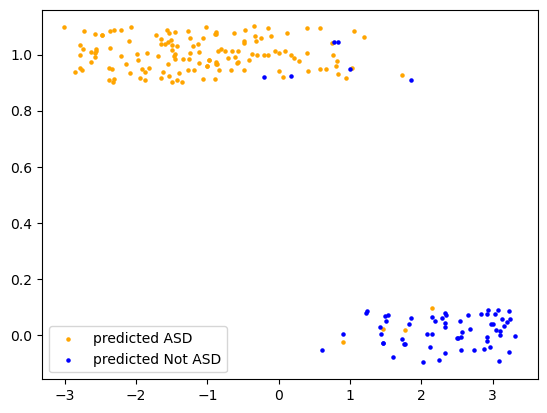

In [ ]:
# Visualize the result of KNN with LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_new = lda.fit_transform(X_test, y_test)

y_test_new = y_test.apply(lambda x:x + np.random.uniform(-0.1,0.1))

plt.scatter(X_new[knn_classifier.predict(X_test) == 1], y_test_new[knn_classifier.predict(X_test) == 1], marker='o', c='orange', s=5)
plt.scatter(X_new[knn_classifier.predict(X_test) == 0], y_test_new[knn_classifier.predict(X_test) == 0], marker='o', c='blue', s=5)

plt.legend(['predicted ASD', 'predicted Not ASD'], loc='best')
plt.show()

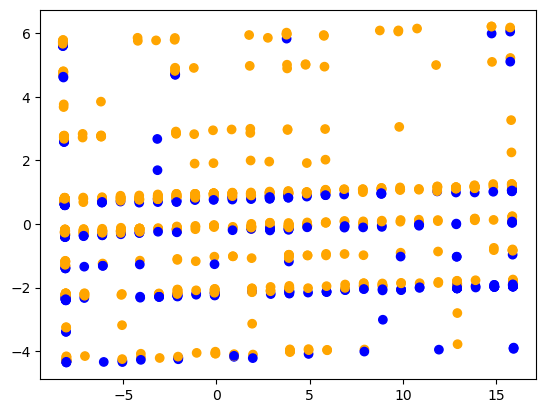

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
color = []
for y in Y_classification:
    color.append('orange' if y == 1 else 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=color) # Orange: ASD; Blue Not ASD;
plt.show()

---